In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


In [4]:
print(x_train.min())
print(x_train.max())

0
255


5


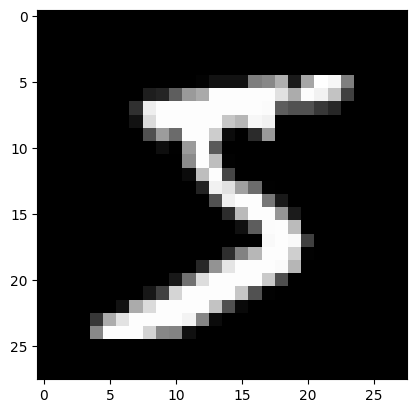

In [5]:
image = x_train[0]
print(y_train[0])
plt.imshow(image, cmap='gray')

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print("Shape of X_Train: ", x_train.shape)
x_train[0]

Shape of X_Train:  (60000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
categories = 10

In [9]:
y_train = keras.utils.to_categorical(y_train, categories)
y_test = keras.utils.to_categorical(y_test, categories)

In [10]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784, )))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

C:\Users\Pratik Bhilore\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9034 - loss: 0.3157 - val_accuracy: 0.9653 - val_loss: 0.1136
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0859 - val_accuracy: 0.9788 - val_loss: 0.0758
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0576 - val_accuracy: 0.9748 - val_loss: 0.1031
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0426 - val_accuracy: 0.9810 - val_loss: 0.0822
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0332 - val_accuracy: 0.9805 - val_loss: 0.0938


In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.1145


0.9804999828338623

In [15]:
prediction = model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.96333433e-17, 2.60986409e-13, 1.93895854e-12, ...,
        1.00000000e+00, 7.24953331e-17, 3.08101363e-13],
       [5.75792605e-20, 2.73513934e-10, 1.00000000e+00, ...,
        3.71760685e-22, 1.38269192e-22, 3.96531566e-32],
       [9.12123956e-15, 1.00000000e+00, 3.12192806e-11, ...,
        2.29283277e-08, 1.33098003e-11, 3.90488179e-13],
       ...,
       [3.78057562e-22, 9.09447695e-17, 1.14241905e-23, ...,
        3.50695929e-15, 1.30131206e-18, 9.67749535e-13],
       [1.14490052e-17, 2.02496064e-17, 1.10299744e-20, ...,
        1.44448944e-15, 3.07907207e-11, 1.02454487e-18],
       [7.14911039e-22, 2.12563001e-27, 1.70320842e-28, ...,
        1.41508699e-30, 8.48786377e-23, 1.19493671e-22]], dtype=float32)